In [1]:
# data 수집-연어
salmon_length  = [ 25.4 , 26.3 , 26.5 , 29.0 , 29.0 , 29.7 , 29.7 , 30.0 , 30.0 , 30.7 , 31.0 , 31.0 , 31.5 , 32.0 , 32.0 , 32.0 , 33.0 , 33.0 , 33.5 , 33.5 , 34.0 , 34.0 , 34.5 , 35.0 , 35.0 , 35.0 , 35.0 , 36.0 , 36.0 , 37.0 , 38.5 , 38.5 , 39.5 , 41.0 , 41.0, 41.5, 41.5, 41.5, 42.0, 42.0 ]
salmon_weight  = [ 242.0 , 290.0 , 340.0 , 363.0 , 430.0 , 450.0 , 500.0 , 390.0 , 450.0 , 500.0 , 475.0 , 500.0 , 500.0 , 340.0 , 600.0 , 600.0 , 700.0 , 700.0 , 610.0 , 650.0 , 575.0 , 685.0 , 620.0 , 680.0 , 700.0 , 725.0 , 720.0 , 714.0 , 850.0 , 1000.0 , 920.0 , 955.0 , 925.0 , 975.0 , 950.0, 980.0, 995.0, 990.0, 1000.0, 1005.0 ]


In [2]:
print("salmon_length",len(salmon_length),"salmon_weight",len(salmon_weight))

salmon_length 40 salmon_weight 40


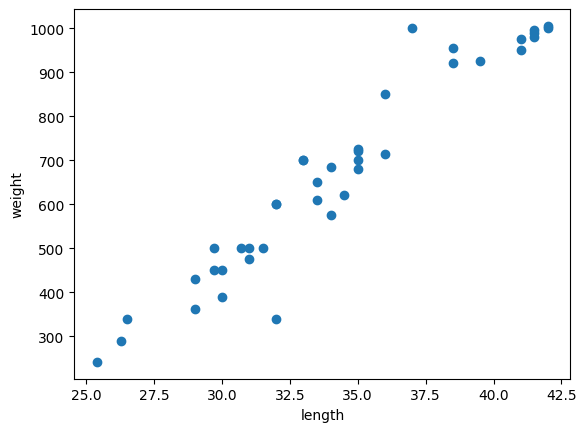

In [6]:
import matplotlib.pyplot as plt # matplotlib의 pyplot 클래스를 plt로 줄여서 사용

plt.scatter(salmon_length, salmon_weight)
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

In [7]:
# data 수집-빙어
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 14.8, 15.0, 15.2]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.8, 19.9, 20.1]

In [8]:
print(len(smelt_length),len(smelt_weight))

16 16


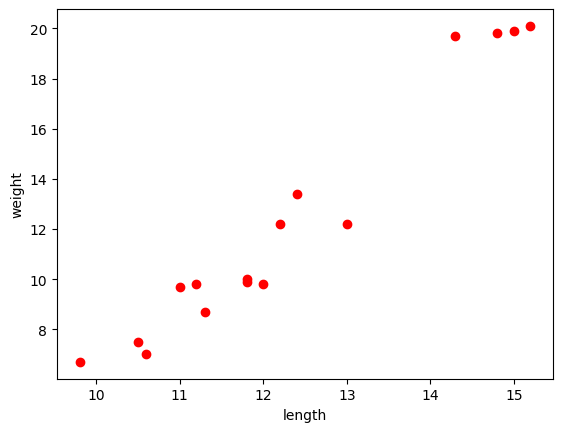

In [11]:
plt.scatter(smelt_length,smelt_weight,c="red")
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

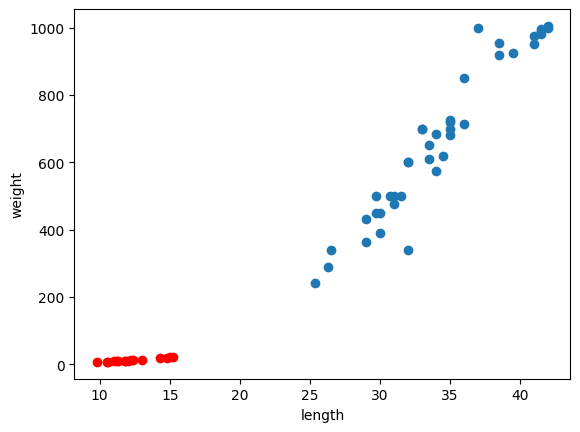

In [12]:

plt.scatter(salmon_length, salmon_weight)

plt.scatter(smelt_length,smelt_weight,c="red")
plt.xlabel("length")
plt.ylabel("weight")
plt.show()


In [13]:
# data 전처리

fish_length = salmon_length + smelt_length
fish_weight = salmon_weight + smelt_weight

print(len(fish_weight)) # 40(연어) + 16(빙어)

56


In [15]:
import numpy as np

fish_data = np.column_stack((fish_length,fish_weight))
print(fish_data.shape,"\n",fish_data)

(56, 2) 
 [[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [  41.5  980. ]
 [  41.5  995. ]
 [  41.5  990. ]
 [  42.  1000. ]
 [  42.  1005. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  14.8   19.8]
 [  15.    19.9]
 [  15.2   20.1]]


In [16]:
fish_target = np.concatenate((np.ones(40),np.zeros(16))) # 넘파이배열 연결
print(fish_target)
#연어:1 빙어:0

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]


In [21]:
from sklearn.model_selection import train_test_split
# input/target을 train/test test_size 비율로 나눈다. shuffle 의 default 값은 True
train_input, test_input, train_target, test_target = train_test_split(fish_data,fish_target,stratify=fish_target,random_state=42,test_size=0.25)

In [22]:
print(train_input.shape,test_input.shape)

(42, 2) (14, 2)


In [36]:
print(train_target.shape,test_target.shape)
print(train_target) # stratify를 통한 균일한 클래스 분포
print(test_target) # stratify를 통한 균일한 클래스 분포

(42,) (14,)
[1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0. 0.]
[1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0.]


In [25]:
#알고리즘 선정
from sklearn.neighbors import KNeighborsClassifier

In [26]:
# AI 모델 생성
kn = KNeighborsClassifier()

In [27]:
# 모델 학습
kn.fit(train_input,train_target)

KNeighborsClassifier()

In [28]:
# 모델 평가
kn.score(test_input,test_target)

1.0

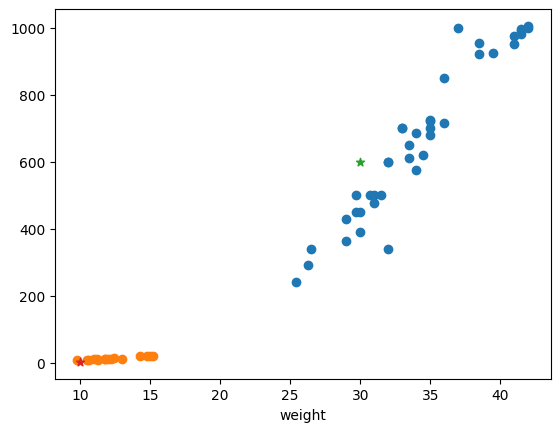

In [31]:
plt.scatter(salmon_length,salmon_weight)
plt.scatter(smelt_length,smelt_weight)
plt.scatter(30,600,marker="*")
plt.scatter(10,2,marker="*")

plt.xlabel('length')
plt.xlabel('weight')
plt.show()

In [32]:
# 모델 예측
kn.predict([[30,600],[10,2]])

array([1., 0.])

In [33]:
#K최근접이웃분류 모델 하이퍼 파라미터 조정 / n_neighbors
kn_42 = KNeighborsClassifier(n_neighbors=42)

In [34]:
kn_42.fit(train_input,train_target)

KNeighborsClassifier(n_neighbors=42)

In [38]:
print(kn_42.score(test_input,test_target)
)
10/14 # 연어만 맞출 수 있는 모델이 됨

0.7142857142857143


0.7142857142857143

In [39]:
# 학습 데이터와 훈련데이터를 나눌 때 shuffle하지 않음

In [43]:
train_ns_input, test_ns_input, train_ns_target, test_ns_target = train_test_split(fish_data,fish_target, random_state = 42,test_size = 0.25, shuffle = False)
#stratify를 사용하려면 꼭 shuffle을 해야함
print(train_ns_target)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0.]


In [44]:
kn_ns = KNeighborsClassifier()
kn_ns.fit(train_ns_input,train_ns_target)

KNeighborsClassifier()

In [46]:
kn_ns.score(test_ns_input,test_ns_target) # 모두 salmon으로 분류할텐데 test data의 클래스는 모두 smelt임

0.0